<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/NN1_BackPropagation_MNIST_Validation0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def sigmoid(z):

  return 1 / ( 1 + np.exp(-z))

In [3]:
class DataGeneration():

  def __init__(self, file_path, seperation_rate, target_position):

    self.file_path = file_path

    self.seperation_rate = seperation_rate

    if (target_position == -1 or target_position == 0):
        self.target_position = target_position

    else:
      err_str = 'target_position must be -1 or 0'
      raise Exception(err_str)

  def __display_target_distribution(self, data, str_of_kind):

    self.target_data = data[:,self.target_position]

    unique, counts = np.unique(self.target_data, return_counts = True)

    unique_target = []
    
    print("===========================================================================================================================")

    for i in range(len(unique)):

      print("[DataGeneration] unique number of " + str_of_kind + " = ", unique[i],", count = ",counts[i])
      unique_target.append(i)

    for i in range(len(unique_target)):
      print("[DataGeneration] unique number of " + str_of_kind + " = ", unique_target[i], ", ratio = ", np.round(100 * counts[i] / len(self.target_data),2), '%')

    print("===========================================================================================================================")
    
  def generate(self):

    try:
      loaded_data = np.loadtxt(self.file_path, delimiter = ',', dtype = np.float32)
    except Exception as err:
      print('[DataGeneration::generate()] ',str(err))
      raise Exception(str(err))

    self.__display_target_distribution(loaded_data, 'original data')

    total_data_num = len(loaded_data)
    test_data_num = int(total_data_num * self.seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[0:test_data_num]
    training_data = loaded_data[test_data_num: ] 

    self.__display_target_distribution(training_data, 'training data')
    self.__display_target_distribution(test_data, 'test data')

    return training_data, test_data  

In [4]:
class NeuralNetwork():

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.W2 = np.random.randn(input_nodes,hidden_nodes) / np.sqrt(input_nodes/2)
    self.b2 = np.random.rand(hidden_nodes)

    self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(hidden_nodes/2)
    self.b3 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate
  
  def feed_forward(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) * np.log((1-self.a3) + delta))

  def loss_val(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) * np.log((1-self.a3) + delta))

  def accuracy(self, test_input_data, test_target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(test_input_data)):

      label = test_target_data[i]

      data = (test_input_data[i] / 255.0 * 0.99) + 0.01
      predicted_num = self.predict(data)

      if label == predicted_num:
        matched_list.append(i)
      else:
        unmatched_list.append(i)

    accuracy_val = len(matched_list) / len(test_input_data)

    return accuracy_val, unmatched_list

  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)
    loss_2 = np.dot(loss_3, self.W3.T) * self.a2 * (1 - self.a2)

    self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T, loss_3)
    self.b3 = self.b3 - self.learning_rate * loss_3

    self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T, loss_2)
    self.b2 = self.b2 - self.learning_rate * loss_2
  
  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = sigmoid(z3)

    predicted_num = np.argmax(a3)

    return predicted_num

In [5]:
file_path = './drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_train.csv'
seperation_rate = 0.2
target_position = 0

data_obj = DataGeneration(file_path, seperation_rate, target_position)

(training_data, validation_data) = data_obj.generate()

print("training_data.shape = ",training_data.shape)
print("validation_data.shape = ",validation_data.shape)

[DataGeneration] unique number of original data =  0.0 , count =  5923
[DataGeneration] unique number of original data =  1.0 , count =  6742
[DataGeneration] unique number of original data =  2.0 , count =  5958
[DataGeneration] unique number of original data =  3.0 , count =  6131
[DataGeneration] unique number of original data =  4.0 , count =  5842
[DataGeneration] unique number of original data =  5.0 , count =  5421
[DataGeneration] unique number of original data =  6.0 , count =  5918
[DataGeneration] unique number of original data =  7.0 , count =  6265
[DataGeneration] unique number of original data =  8.0 , count =  5851
[DataGeneration] unique number of original data =  9.0 , count =  5949
[DataGeneration] unique number of original data =  0 , ratio =  9.87 %
[DataGeneration] unique number of original data =  1 , ratio =  11.24 %
[DataGeneration] unique number of original data =  2 , ratio =  9.93 %
[DataGeneration] unique number of original data =  3 , ratio =  10.22 %
[Dat

In [6]:
#hyper_parameter

i_nodes = training_data.shape[1] - 1
h_nodes = 100
o_nodes = 10
lr = 0.1
epochs = 20

loss_val_list = []

training_accuracy_list = []
validation_accuracy_list = []

nn = NeuralNetwork(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
  for step in range(len(training_data)):

    input_data = (training_data[step,1:] / 255.0 * 0.99) + 0.01
    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[step,0])] = 0.09

    nn.train(np.array(input_data, ndmin=2), np.array(target_data, ndmin=2))

    if step % 1000 == 0:
      print("epochs = ", i+1 ,", step = ", step, ", loss value = ", nn.loss_val())
    
    loss_val_list.append(nn.loss_val())
  
  (training_accuracy, unmatched_list) = nn.accuracy(training_data[:, 1:], training_data[:,0])
  (validation_accuracy, unmatched_list) = nn.accuracy(validation_data[:, 1: ], validation_data[:,0])

  training_accuracy_list.append(training_accuracy)
  validation_accuracy_list.append(validation_accuracy)

end_time = datetime.now()
print("\nElapsed time = ", end_time - start_time)

epochs =  1 , step =  0 , loss value =  8.724995187073457
epochs =  1 , step =  1000 , loss value =  0.9067800720311849
epochs =  1 , step =  2000 , loss value =  0.9080926974048938
epochs =  1 , step =  3000 , loss value =  0.8958647165979096
epochs =  1 , step =  4000 , loss value =  0.8942885059929142
epochs =  1 , step =  5000 , loss value =  0.8969414873146575
epochs =  1 , step =  6000 , loss value =  0.8956039260245122
epochs =  1 , step =  7000 , loss value =  0.8836588701461635
epochs =  1 , step =  8000 , loss value =  0.8969079207040589
epochs =  1 , step =  9000 , loss value =  0.9123207316431664
epochs =  1 , step =  10000 , loss value =  0.8871156658282036
epochs =  1 , step =  11000 , loss value =  0.8908029503887098
epochs =  1 , step =  12000 , loss value =  0.9032525320244525
epochs =  1 , step =  13000 , loss value =  0.888910853012646
epochs =  1 , step =  14000 , loss value =  0.8949851581865899
epochs =  1 , step =  15000 , loss value =  0.8592971218005429
epochs 

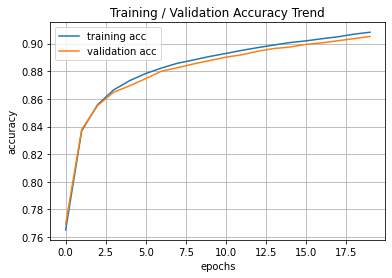

In [7]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.plot(training_accuracy_list)
plt.plot(validation_accuracy_list)
plt.legend(['training acc', 'validation acc'])

plt.show()

In [11]:
test_data = np.loadtxt('./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_test.csv', delimiter = ',', dtype = np.float32)

test_input_data = test_data[:, 1: ]
test_target_data = test_data[:,0]

print("test_data.shape = ",test_data.shape)

test_data.shape =  (10000, 785)


In [12]:
(acc_ret, false_list) = nn.accuracy(test_input_data, test_target_data)

print("Accuracy = ", np.round(100*acc_ret,3),'%')

Accuracy =  91.5 %


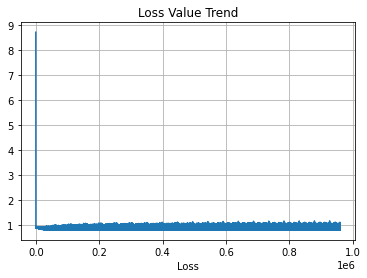

In [13]:
plt.title('Loss Value Trend')
plt.xlabel('epochs')
plt.xlabel('Loss')
plt.grid()
plt.plot(loss_val_list)

plt.show()

In [19]:
max_loss = np.max(loss_val_list)
max_loss_index = np.argmax(loss_val_list)

min_loss = np.min(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss", min_loss, ", min_loss_index", min_loss_index)   

epochs_num = int(max_loss_index/len(training_data))

if max_loss_index > len(training_data):
  real_max_loss_index = max_loss_index - epochs_num * len(training_data)
else:
  real_max_loss_index = max_loss_index

epochs_num = int(min_loss_index/len(training_data))

if min_loss_index > len(training_data):
  real_min_loss_index = min_loss_index - epochs_num * len(training_data)
else:
  real_min_loss_index = min_index

print("real_max_loss_index = ", real_max_loss_index, ", real_min_loss_index = ", real_min_loss_index)

max_loss =  8.724995187073457 , max_loss_index =  0 , min_loss 0.8080233313338058 , min_loss_index 776088
real_max_loss_index =  0 , real_min_loss_index =  8088


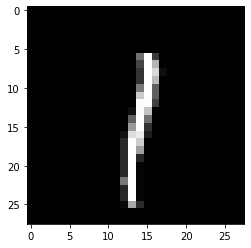

label =  1
prediction =  1


In [18]:
img = training_data[real_max_loss_index, 1: ].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_max_loss_index,0])

input_data = (training_data[real_max_loss_index,1: ] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data,ndmin = 2))

print("label = ", target)
print("prediction = ", predicted_num)

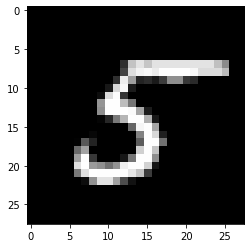

label =  5.0
prediction =  5


In [20]:
img = training_data[real_min_loss_index, 1: ].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = training_data[real_min_loss_index, 0]

input_data = training_data[real_min_loss_index, 1: ] / 255.0 * 0.99 + 0.01

predicted_num = nn.predict(np.array(input_data,ndmin = 2))


print("label = ", target)
print("prediction = ",predicted_num)